This notebook generates figures illustrating the conservation properties of the heat equation with Neumann boundary conditions (with a=0, b=1), as described in Supplementary Material Section 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Llama-3.1-8B model data
with np.load("8B_10_step.npz", allow_pickle=True) as data_8b:
    # Conservation metrics for 8B
    llm_integral_changes_8B = data_8b["llm_integral_changes_8B"]
    std_llm_integral_changes_8B = data_8b["std_llm_integral_changes_8B"]
    ci_lower_integral_8B = data_8b["ci_lower_integral_8B"]
    ci_upper_integral_8B = data_8b["ci_upper_integral_8B"]

    # FD and exact conservation metrics
    ftcs_integral_changes = data_8b["ftcs_integral_changes"]
    btcs_integral_changes = data_8b["btcs_integral_changes"]
    exact_integral_changes = data_8b["exact_integral_changes"]
    std_ftcs_integral_changes = data_8b["std_ftcs_integral_changes"]
    std_btcs_integral_changes = data_8b["std_btcs_integral_changes"]
    std_exact_integral_changes = data_8b["std_exact_integral_changes"]

# Load Llama-3.2-3B model data
with np.load("3B_10_step.npz", allow_pickle=True) as data_3b:
    # Conservation metrics for 3B
    llm_integral_changes_3B = data_3b["llm_integral_changes_3B"]
    std_llm_integral_changes_3B = data_3b["std_llm_integral_changes_3B"]
    ci_lower_integral_3B = data_3b["ci_lower_integral_3B"]
    ci_upper_integral_3B = data_3b["ci_upper_integral_3B"]

# Load Llama-3.2-1B model data
with np.load("1B_10_step.npz", allow_pickle=True) as data_1b:
    # Conservation metrics for 1B
    llm_integral_changes_1B = data_1b["llm_integral_changes_1B"]
    std_llm_integral_changes_1B = data_1b["std_llm_integral_changes_1B"]
    ci_lower_integral_1B = data_1b["ci_lower_integral_1B"]
    ci_upper_integral_1B = data_1b["ci_upper_integral_1B"]

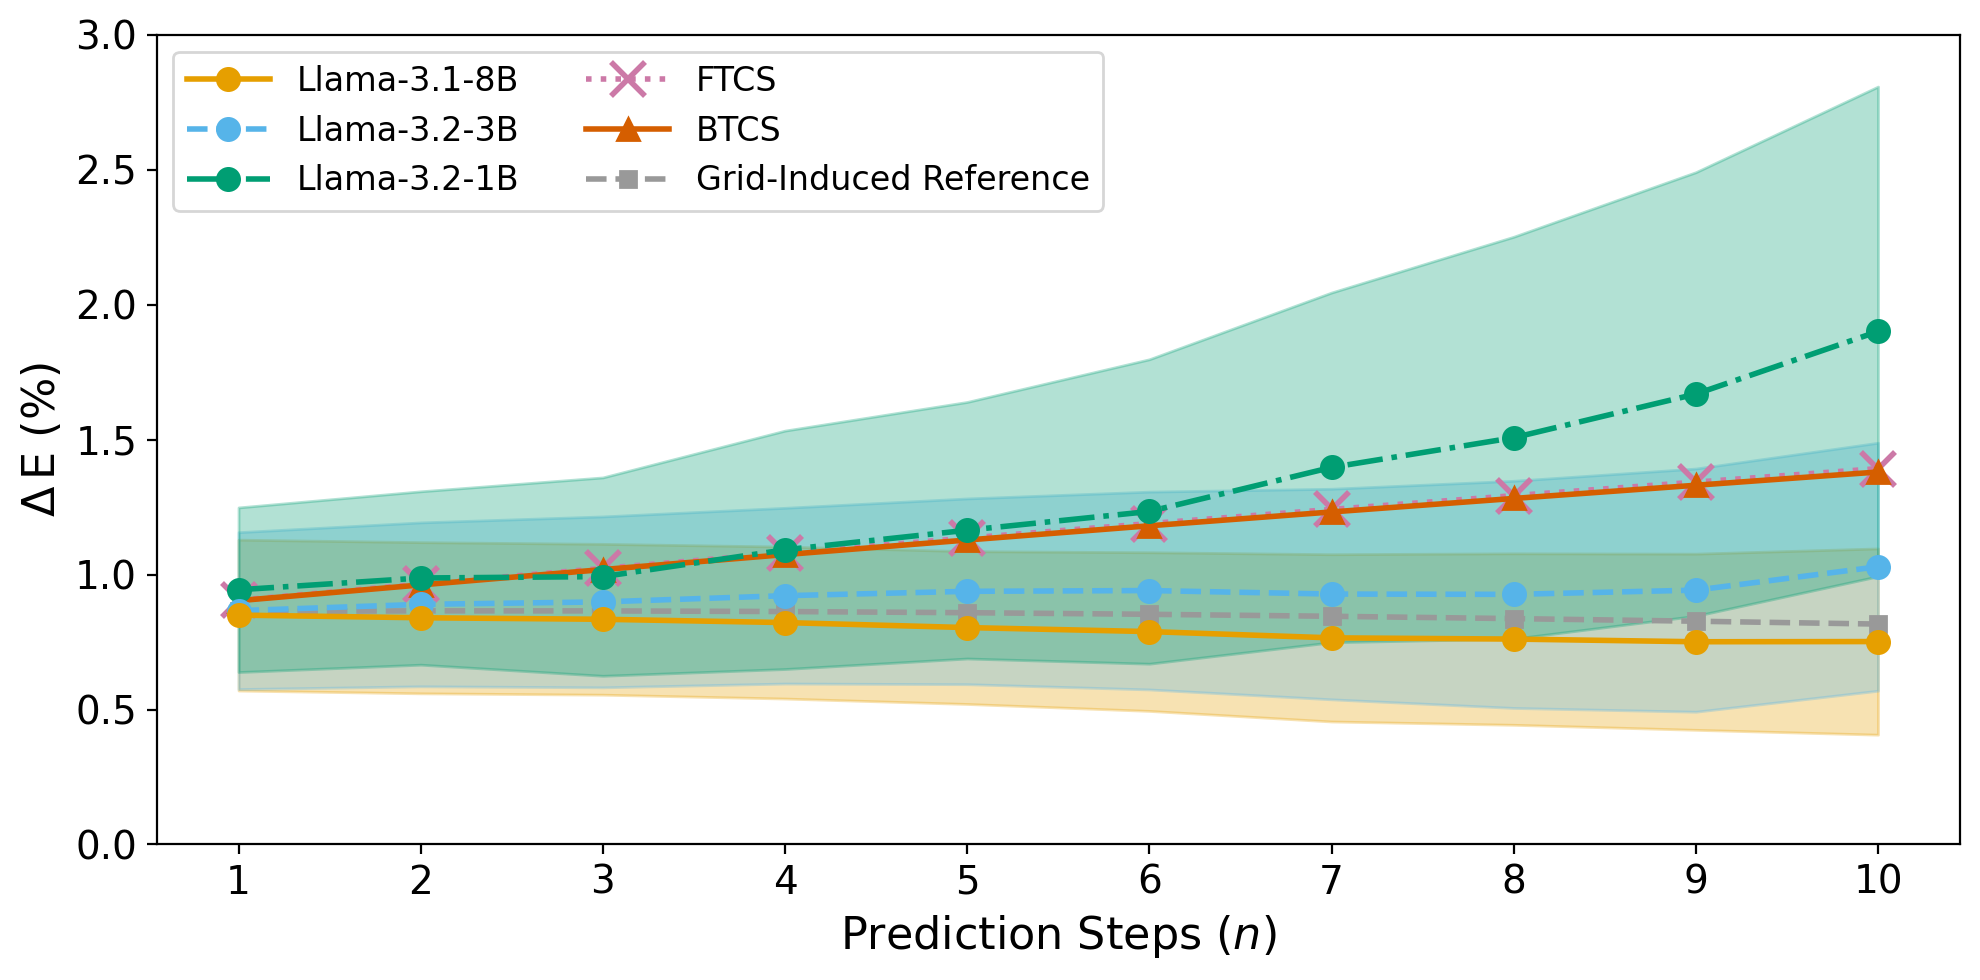

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=200)
steps_array = np.arange(1, len(llm_integral_changes_8B) + 1)
colors = [
    "#E69F00",  # Llama-3.1-8B
    "#56B4E9",  # Llama-3.2-3B
    "#009E73",  # Llama-3.2-1B
    "#CC79A7",  # FTCS
    "#D55E00",  # BTCS
    "#999999",  # Discretization Floor
]
linewidth = 2
markersize = 8

# Plot LLM conservation errors with confidence intervals
ax.plot(steps_array, llm_integral_changes_8B, 'o-', label='Llama-3.1-8B',
        color=colors[0], markersize=markersize, linewidth=linewidth, zorder=5)
ax.fill_between(steps_array, ci_lower_integral_8B, ci_upper_integral_8B,
                alpha=0.3, color=colors[0])
ax.plot(steps_array, llm_integral_changes_3B, 'o--', label='Llama-3.2-3B',
        color=colors[1], markersize=markersize, linewidth=linewidth, zorder=4)
ax.fill_between(steps_array, ci_lower_integral_3B, ci_upper_integral_3B,
                alpha=0.3, color=colors[1])
ax.plot(steps_array, llm_integral_changes_1B, 'o-.', label='Llama-3.2-1B',
        color=colors[2], markersize=markersize, linewidth=linewidth, zorder=3)
ax.fill_between(steps_array, ci_lower_integral_1B, ci_upper_integral_1B,
                alpha=0.3, color=colors[2])
# Plot FD solver conservation errors
ax.plot(steps_array[:len(ftcs_integral_changes)], ftcs_integral_changes, 'x:', 
        markeredgewidth=2, label='FTCS', 
        color=colors[3], markersize=12, linewidth=linewidth)
ax.plot(steps_array[:len(btcs_integral_changes)], btcs_integral_changes, '^-',
        label='BTCS', 
        color=colors[4], markersize=markersize, linewidth=linewidth)
# Plot discretization floor
ax.plot(steps_array[:len(exact_integral_changes)], exact_integral_changes, 's--',
        label='Grid-Induced Reference', 
        color=colors[5], markersize=6, linewidth=linewidth)
ax.set_xlabel("Prediction Steps ($n$)", fontsize=16)
ax.set_ylabel("$\\Delta \\,\\mathrm{E}$ (%)", fontsize=16)
ax.set_xticks(steps_array)
ax.set_xticklabels([str(int(pos)) for pos in steps_array])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(0, 3)
ax.legend(loc='upper left', ncol=2, fontsize=12, handlelength=2.5)
plt.tight_layout()
plt.show()